## Homework Exercise

Start from this notebook.

Assume house price depends not only on size,but also on number of windows.


n_samples = 100

n_windows = np.random.randint(3,8,n_samples)

house_prices = 100 + 0.2 * house_sizes - 0.00003 * house_sizes**2 + np.random.normal(0, 50, n_samples) + 15*n_windows

Try:
1) change the initial data, but keep using only house_sizes as regressor. What has changed?
Ricavo un valore di MSE RMSE più elevato. R-squared value più basso.
e amcora RMSE moloto più elevato in tutti i TRS.
2) adapt the notebook to using both house_sizes and n_windows as regressors. What has changed?


3) come up with a good way to visualize linear regression outputs with 2 regressors




In [1]:
!pip install scikit-learn

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

from mpl_toolkits.mplot3d import Axes3D

# Create a dataset
Create a simple dataset about house sizes and prices.
Assume house price depends not only on size, but also on number of windows.

In [79]:
# Create a sample dataset (house size in square feet and price in thousands of dollars)
np.random.seed(42)  # For reproducible results
n_samples = 200
task='classification','linear_regression'
# House sizes between 1000 and 3000 square feet
house_sizes = np.random.randint(1000, 3000, n_samples)
#Assume house price depends not only on size, but also on number of windows.
n_windows = np.random.randint(3,8,n_samples)

# House prices with some relationship to size plus random noise and windows that increase the price
house_prices = 100 + 0.2 * house_sizes - 0.00003 * house_sizes**2 + np.random.normal(0, 50, n_samples)+ 15 * n_windows

# Create a DataFrame
data = pd.DataFrame({
    'Size': house_sizes,
    'Price': house_prices
})

use_windows = True
#use_windows = False

data_w = pd.DataFrame({
    'Size': house_sizes,
    'Windows': n_windows,
    'Price': house_prices
})

# Display the first 5 rows of the dataset
data.head()
data_w.head()

,Size,Windows,Price
0,2126,6,500.535693
1,2459,7,478.990608
2,1860,6,368.117602
3,2294,7,529.312774
4,2130,7,417.321303


# Visualize the data

It's important to visualize your data to understand the relationship between variables before building a model.

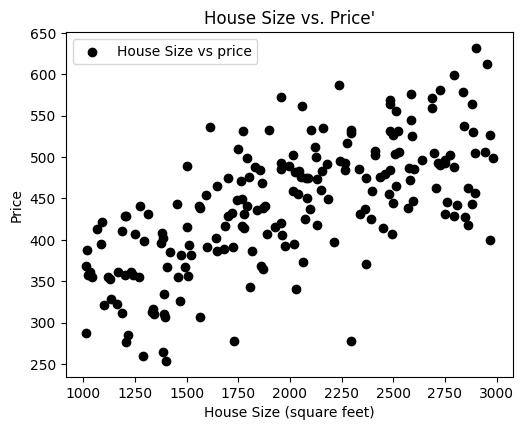

In [80]:
# Create a scatter plot of house size vs. price
X=data['Size']
Y=data['Price']

#to include both te beatures
Y_1 = data_w['Price'] 
X_1 = data_w[['Size','Windows']] 

fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(2, 2, 1)
ax1.scatter(X,Y, label='House Size vs price', color="black")
ax1.set_title("House Size vs. Price'")
ax1.set_xlabel("House Size (square feet)")
ax1.set_ylabel("Price")
ax1.legend()

if use_windows:
    ax2 = fig.add_subplot(2, 2, 3)
    sc = ax2.scatter(data_w['Size'], data_w['Price'],c = data_w['Windows'], cmap='viridis', label='House Size vs Price/Windows')
    ax2.set_title("House Size vs. Price/windows")
    ax2.set_xlabel("Size (square feet)")
    ax2.set_ylabel("Price")
    plt.colorbar(sc, ax=ax2, label="Number of Windows")
    
    ax3 = fig.add_subplot(2, 2, 2, projection='3d')
    #fig = plt.figure(figsize=(10, 8))
    ax3.scatter(data_w['Size'], data_w['Windows'], data_w['Price'], c=data_w['Windows'], cmap='viridis')
    ax3.set_xlabel('House Size (square feet)')
    ax3.set_ylabel('Number of Windows')
    ax3.set_zlabel('Price')
    ax3.set_title('House Size, Windows, Price - 3D Plot')

plt.tight_layout()
plt.show()



[Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox)

## Step 4: Split the data into training and testing sets

Before training our model, we need to split our data into:
- **Training set**: Used to train the model
- **Testing set**: Used to evaluate how well the model performs on new, unseen data

Why?

We need to ensure our model **generalizes** enough, meaning it does not learn the specific structure of the training set, but rather learns the underlying structure of $f$

In [81]:
# Define features (X) and target (y)

if use_windows:
    X = data_w[['Size', 'Windows']] # Features (input)
    y = data_w['Price'] # Target (output)
else:
    X = data[['Size']]
    y = data['Price']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape[0]} samples")
print(f"Testing data size: {X_test.shape[0]} samples")

Training data size: 160 samples
Testing data size: 40 samples


# Create and train the model

Now we'll create a linear regression model and train it using our training data.

In [82]:
# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Check the coefficient (slope) and intercept of our linear model

if use_windows:
    print(f"Model coefficient (slope) for size: {model.coef_[0]:.4f}")
    print(f"Model coefficient (slope) for windows: {model.coef_[1]:.4f}")
    print(f"y = {model.intercept_:.4f} + {model.coef_[0]:.4f} * Size + {model.coef_[1]:.4f} * Windows")
else:
    print(f"Model coefficient (slope): {model.coef_[0]:.4f}")
    print(f"y = {model.intercept_:.4f} + {model.coef_[0]:.4f}")
    print(f"y = {model.intercept_:.4f} + {model.coef_[0]:.4f} * x")

Model coefficient (slope): 0.0959
y = 250.9276 + 0.0959
y = 250.9276 + 0.0959 * x


#per salvare il modello 
model.to_pickle()

## Step 6: Make predictions and evaluate the model

Let's use our trained model to make predictions on the test data and evaluate how well it performs.

In [83]:
# Make predictions on the test data
y_pred = model.predict(X_test)
#model.predict è la funzione f^()=y^

# Calculate the mean squared error (MSE) - a common metric to evaluate regression models
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred) # Calculate R-squared score (coefficient of determination)


print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 2570.34
Root Mean Squared Error: 50.70
R-squared Score: 0.4739


valuto la discrepanza tra le y vere e le y predette dal modello --> cerco di minimizzare questo errore con 
RMSE: è meglio. Con l'errore medio quadratico valuto meglio le differenze maggiori, più estreme rispetto alla media.per definire gli outlier


## Step 7: Visualize the results

Finally, let's visualize our model's predictions against the actual data to see how well our linear regression line fits.

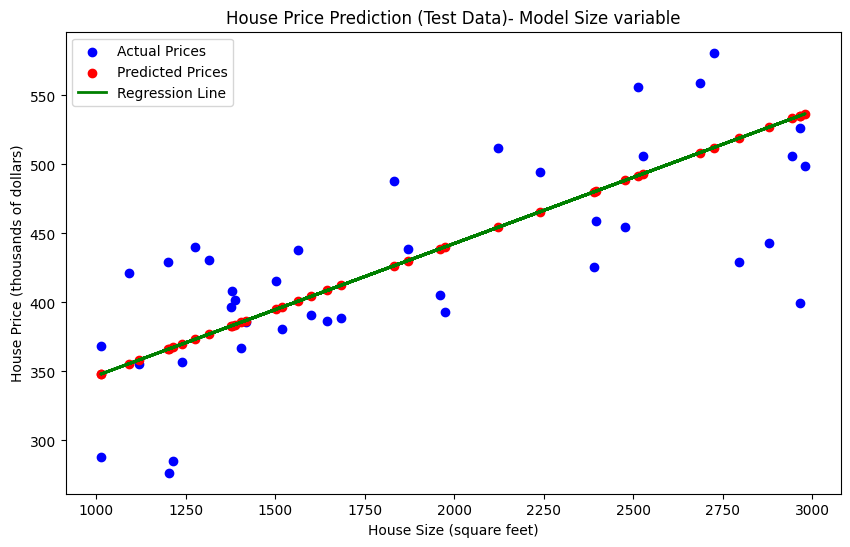

In [84]:
# Plot the original data points
plt.figure(figsize=(10, 6))

if not use_windows:
    plt.scatter(X_test['Size'], y_test, color='blue', label='Actual Prices')
    plt.scatter(X_test['Size'], y_pred, color='red', label='Predicted Prices') # Plot the predicted data points
    plt.plot(X_test['Size'], y_pred, color='green', linewidth=2, label='Regression Line') # Plot the regression line
    
    plt.title('House Price Prediction (Test Data)- Model Size variable')
    plt.xlabel('House Size (square feet)')
    plt.ylabel('House Price (thousands of dollars)')
    plt.legend()

else:
    #sorted_indices = np.argsort(X_test['Size'])
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the actual data points in 3D with separate colors for Size and Windows
    #sc1 = ax.scatter(X_test['Size'], X_test['Windows'], y_test, c=X_test['Size'], cmap='Blues', label='Actual Prices - Size')
    #sc2 = ax.scatter(X_test['Size'], X_test['Windows'], y_test, c=X_test['Windows'], cmap='Reds', label='Actual Prices - Windows', alpha=0.5)
    sc1 = ax.scatter(X_test['Size'], X_test['Windows'], y_test, c=y_test, cmap='Blues', label='Actual Prices - Size')
    sc2 = ax.scatter(X_test['Size'], X_test['Windows'], y_test, c=y_test, cmap='Reds', label='Actual Prices - Windows', alpha=0.5)

    
    # Plot the predicted data points in 3D with separate colors for Size and Windows
    #ax.scatter(X_test['Size'], X_test['Windows'], y_pred, color='green', label='Predicted Prices', alpha=0.5)

    # Create a grid for the regression plane (linear regression with 2 features)
    size_range = np.linspace(X_test['Size'].min(), X_test['Size'].max(), 100)
    windows_range = np.linspace(X_test['Windows'].min(), X_test['Windows'].max(), 100)
    size_grid, windows_grid = np.meshgrid(size_range, windows_range)
    
    # Calculate the predicted prices from the linear regression model
    #prices_grid = model.intercept_ + model.coef_[0] * size_grid + model.coef_[1] * windows_grid
    
    #ax.plot_surface(size_grid, windows_grid, prices_grid, color='orange', alpha=0.3, label='Regression Plane') # Plot the regression plane
    X_grid = np.column_stack([size_grid.ravel(), windows_grid.ravel()])
    z_pred = model.predict(X_grid).reshape(size_grid.shape)
    
    # Plot regression plane
    ax.plot_surface(size_grid, windows_grid, z_pred, 
                    color='green', alpha=0.3, label='Regression Plane')
    
    # Set labels and title
    ax.set_xlabel('House Size (square feet)')
    ax.set_ylabel('Number of Windows')
    ax.set_zlabel('Price (thousands of dollars)')
    ax.set_title('House Size, Windows, and Price - 3D Plot with Regression Plane')

    # Show the color bars for Size and Windows
    fig.colorbar(sc1, ax=ax, label="Size (square feet)", shrink=0.5, aspect=10)
    fig.colorbar(sc2, ax=ax, label="Number of Windows", shrink=0.5, aspect=10)
    
    ax.legend()
    ax.grid(True)

plt.show()

## Step 8: Use the model to make new predictions

Now that we have a trained model, we can use it to predict the price of houses with sizes that weren't in our original dataset.

In [85]:
#tre step iniziali:
#LOAD MODEL
#collect real world set of input
#make predictions

# Create some new house sizes that we want to predict prices for
if use_windows:
    new_house_sizes = np.array([[1500,5], [2000,6], [2500,7]])
else:
    new_house_sizes = np.array([[1500], [2000], [2500]])
    
# Use our model to predict the prices
predicted_prices = model.predict(new_house_sizes)

# Display the results
if not use_windows:
    for size, price in zip(new_house_sizes.flatten(), predicted_prices):
        print(f"A house with {size} square feet is predicted to cost ${price:.2f} thousand")
else:
    for size, windows, price in zip(new_house_sizes[:,0], new_house_sizes[:,1], predicted_prices):
        print(f"A house with {size} square feet and {windows} windows is predicted to cost ${price:.2f} thousand")

A house with 1500 square feet is predicted to cost $394.76 thousand
A house with 2000 square feet is predicted to cost $442.71 thousand
A house with 2500 square feet is predicted to cost $490.65 thousand


C:\Users\marti\PycharmProjects\ML\.env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## PROVO CON IL TRAIN: PER VEDERE LE DIFFERENZE DI METRICHE 

LA CROSS VALIDATION AIUTA A STABILIZZARE I COEFFICIENTI, quindi il valore dei coeff non sarà dipendente da come ho diviso train e test set, ma lo studio per essere il migliore possibile


Model Performance Comparison:
Training Set:
MSE: 3354.51
RMSE: 57.92
R-squared: 0.4393

Testing Set:
MSE: 2570.34
RMSE: 50.70
R-squared: 0.4739


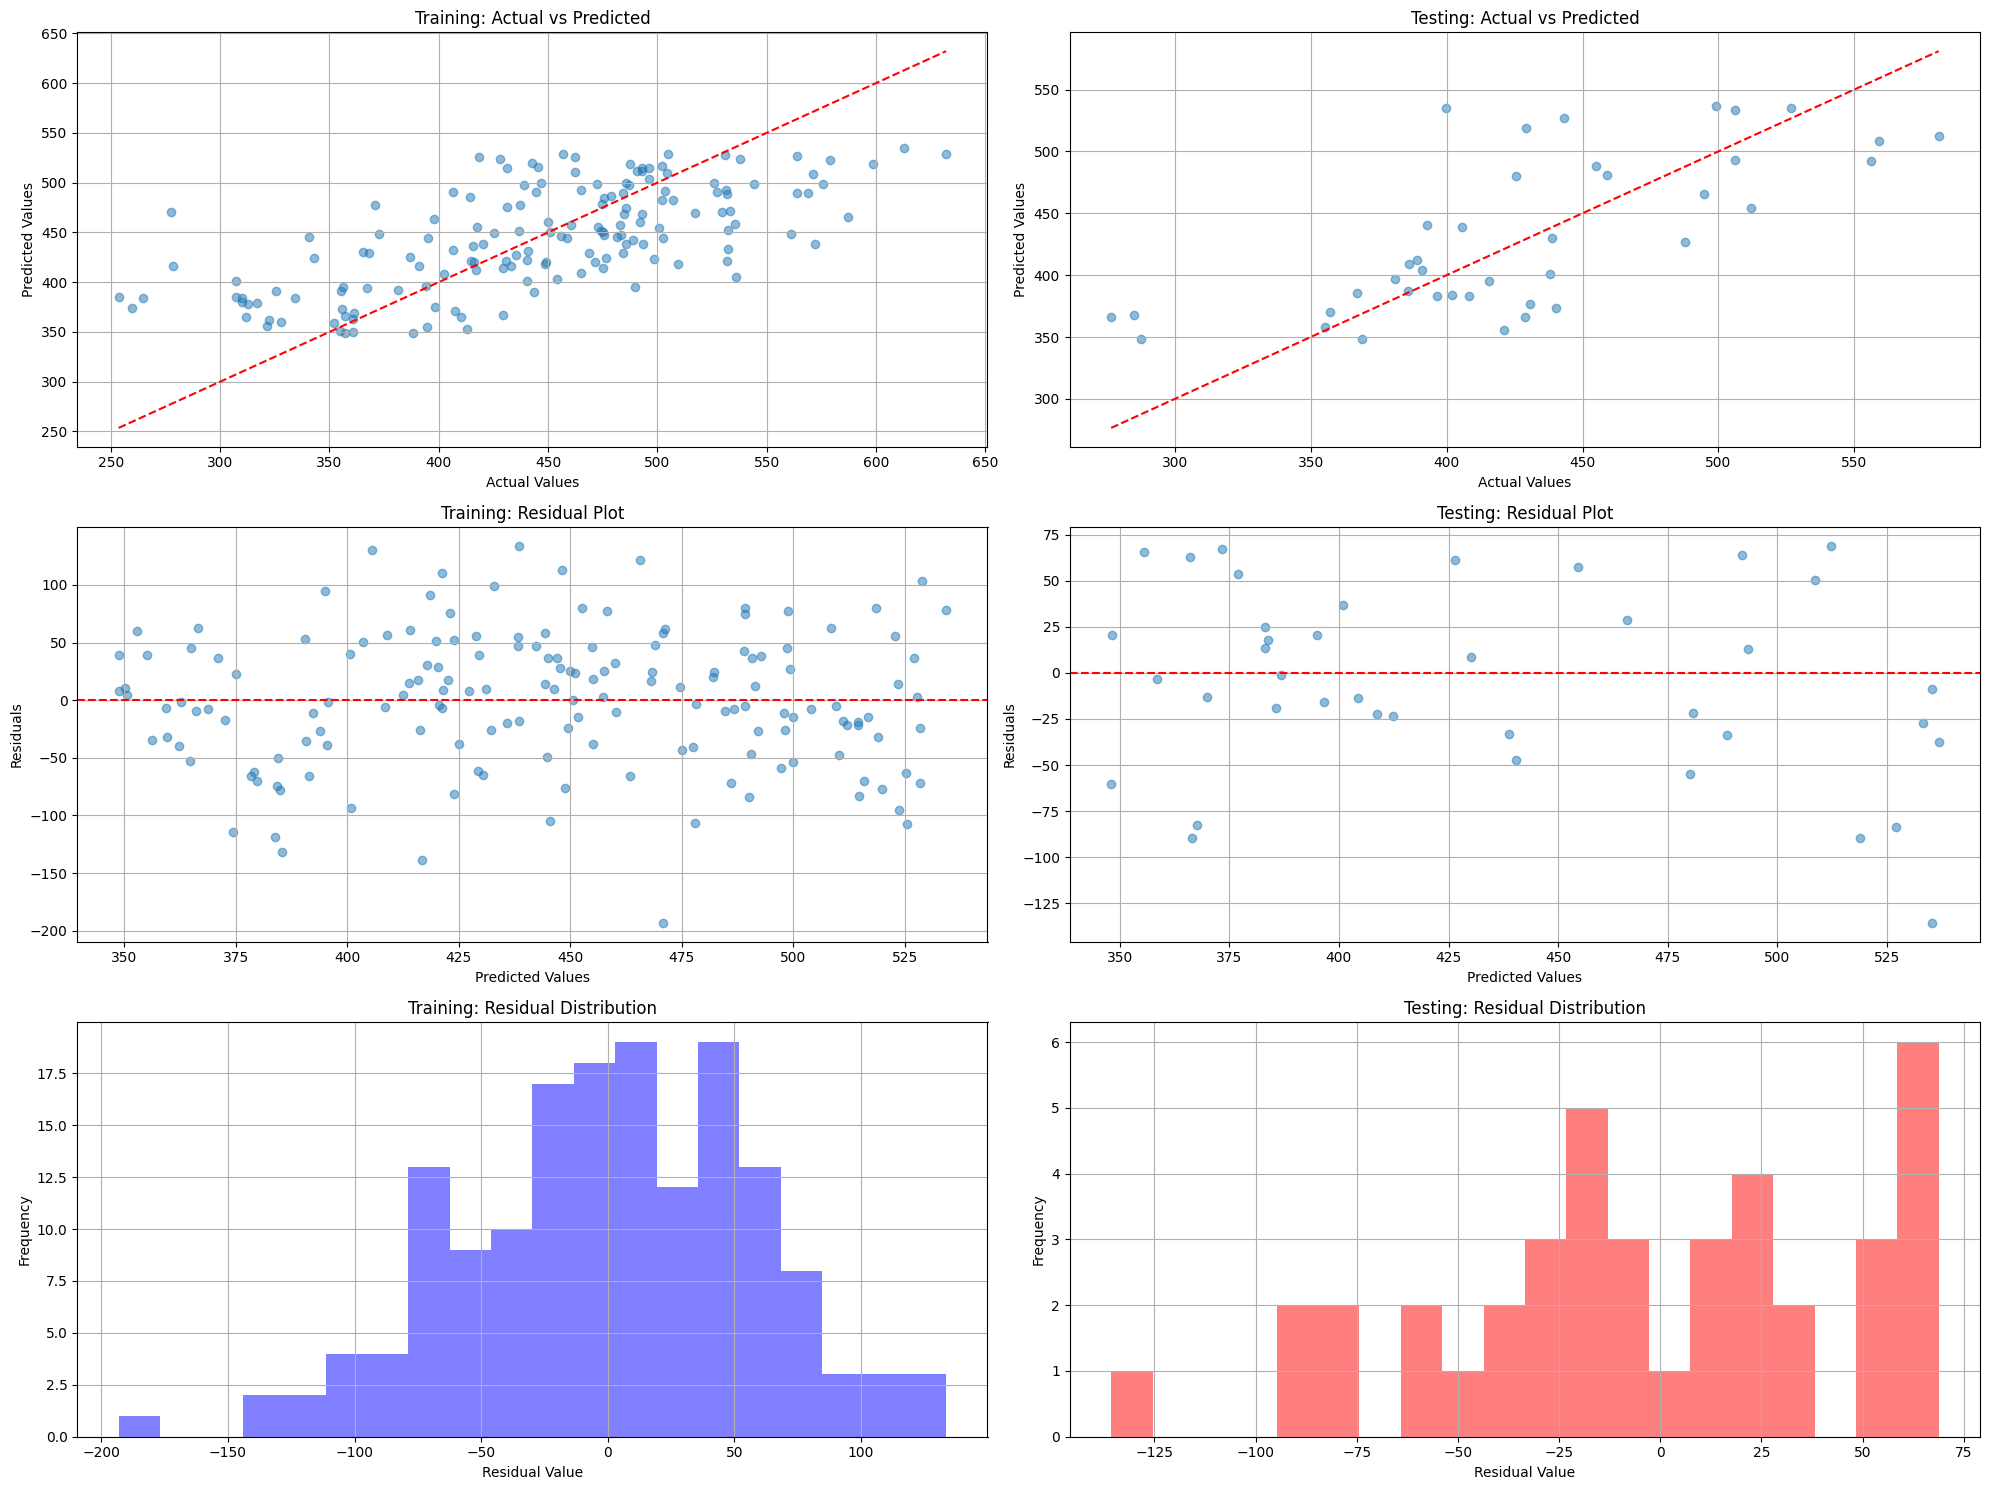

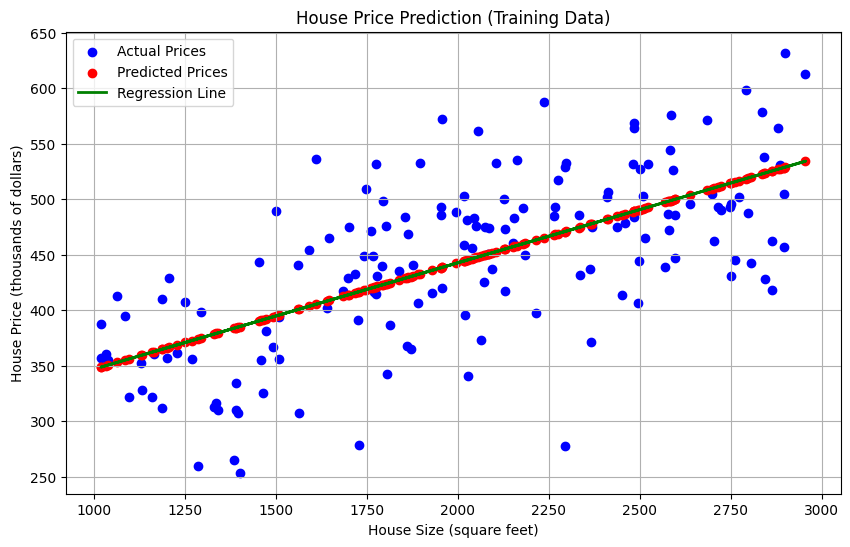

In [86]:
# Make predictions on the test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred) # Calculate R-squared score (coefficient of determination)

# Train set metrics
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nModel Performance Comparison:")
print("Training Set:")
print(f"MSE: {train_mse:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"R-squared: {train_r2:.4f}")

print("\nTesting Set:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.4f}")

# Create a comprehensive visualization for regression analysis
plt.figure(figsize=(20, 15))

# 1. Actual vs Predicted plots
plt.subplot(3, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--')
plt.title('Training: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

plt.subplot(3, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('Testing: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# 2. Residual plots
plt.subplot(3, 2, 3)
train_residuals = y_train - y_train_pred
plt.scatter(y_train_pred, train_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Training: Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)

plt.subplot(3, 2, 4)
test_residuals = y_test - y_pred
plt.scatter(y_pred, test_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Testing: Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)

# 3. Residual distribution
plt.subplot(3, 2, 5)
plt.hist(train_residuals, bins=20, alpha=0.5, color='blue')
plt.title('Training: Residual Distribution')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(3, 2, 6)
plt.hist(test_residuals, bins=20, alpha=0.5, color='red')
plt.title('Testing: Residual Distribution')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()


if use_windows:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    # Plot for House Size
    ax1.scatter(X_train['Size'], y_train, color='blue', label='Actual Prices')
    ax1.scatter(X_train['Size'], y_train_pred, color='red', label='Predicted Prices')
    ax1.set_title('Prices vs House Size')
    ax1.set_xlabel('House Size')
    ax1.set_ylabel('Price')
    ax1.legend()
    
    # Plot for Number of Windows
    ax2.scatter(X_train['Windows'], y_train, color='blue', label='Actual Prices')
    ax2.scatter(X_train['Windows'], y_train_pred, color='red', label='Predicted Prices')
    ax2.set_title('Prices vs Number of Windows')
    ax2.set_xlabel('Number of Windows')
    ax2.set_ylabel('Price')
    ax2.legend()   
    plt.tight_layout()
    plt.show()    

    # 3D visualization with prediction surface
    fig = plt.figure(figsize=(15, 12))
    
    # Training data 3D visualization with surface
    ax1 = fig.add_subplot(121, projection='3d')
    
    # Plot actual data points
    ax1.scatter(X_train['Size'], X_train['Windows'], y_train, c='blue', alpha=0.5, label='Actual Prices')
    
    # Create a mesh grid for the surface
    size_range = np.linspace(min(X_train['Size']), max(X_train['Size']), 20)
    windows_range = np.linspace(min(X_train['Windows']), max(X_train['Windows']), 20)
    size_grid, windows_grid = np.meshgrid(size_range, windows_range)
    
    # Prepare the grid points for prediction
    grid_points = np.column_stack((size_grid.ravel(), windows_grid.ravel()))
    grid_df = pd.DataFrame(grid_points, columns=['Size', 'Windows'])
    
    # Make predictions
    z_pred = model.predict(grid_df).reshape(size_grid.shape)
    
    # Plot the prediction surface
    surf = ax1.plot_surface(size_grid, windows_grid, z_pred, alpha=0.3, cmap='viridis')
    
    # Plot predicted data points
    ax1.scatter(X_train['Size'], X_train['Windows'], y_train_pred, c='red', alpha=0.5, label='Predicted Prices')
    
    ax1.set_xlabel('House Size')
    ax1.set_ylabel('Number of Windows')
    ax1.set_zlabel('Price')
    ax1.set_title('Training Data: 3D Visualization with Prediction Surface')
    ax1.legend()
    
    # Testing data 3D visualization with same surface
    ax2 = fig.add_subplot(122, projection='3d')
    
    # Plot actual test data points
    ax2.scatter(X_test['Size'], X_test['Windows'], y_test, c='blue', alpha=0.5, label='Actual Prices')
    
    # Reuse the prediction surface (but recalculate if needed for test data range)
    if (min(X_test['Size']) < min(X_train['Size']) or max(X_test['Size']) > max(X_train['Size']) or 
        min(X_test['Windows']) < min(X_train['Windows']) or max(X_test['Windows']) > max(X_train['Windows'])):
        # If test data has a different range, create a new grid
        size_range = np.linspace(min(min(X_test['Size']), min(X_train['Size'])), 
                                 max(max(X_test['Size']), max(X_train['Size'])), 20)
        windows_range = np.linspace(min(min(X_test['Windows']), min(X_train['Windows'])), 
                                    max(max(X_test['Windows']), max(X_train['Windows'])), 20)
        size_grid, windows_grid = np.meshgrid(size_range, windows_range)
        grid_points = np.column_stack((size_grid.ravel(), windows_grid.ravel()))
        grid_df = pd.DataFrame(grid_points, columns=['Size', 'Windows'])
        z_pred = model.predict(grid_df).reshape(size_grid.shape)
    
    # Plot the prediction surface
    surf = ax2.plot_surface(size_grid, windows_grid, z_pred, alpha=0.3, cmap='viridis')
    fig.colorbar(surf, ax=ax2, shrink=0.5, aspect=5, label='Predicted Price')
    
    # Plot predicted test data points
    ax2.scatter(X_test['Size'], X_test['Windows'], y_pred, c='red', alpha=0.5, label='Predicted Prices')
    
    ax2.set_xlabel('House Size')
    ax2.set_ylabel('Number of Windows')
    ax2.set_zlabel('Price')
    ax2.set_title('Testing Data: 3D Visualization with Prediction Surface')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()    

else:
    # For single feature visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, color='blue', label='Actual Prices')
    plt.scatter(X_train, y_train_pred, color='red', label='Predicted Prices')
    plt.plot(X_train, y_train_pred, color='green', linewidth=2, label='Regression Line')
    plt.title('House Price Prediction (Training Data)')
    plt.xlabel('House Size (square feet)')
    plt.ylabel('House Price (thousands of dollars)')
    plt.legend()
    plt.grid(True)
plt.show()

nel train set vedo sempre una metrica di accuratezza migliore... voglio che quella del test set sia più possibile simile a questa

Le metriche sul training set servono a verificare se il modello sta imparando bene sui dati di training,
-  ma la vera misura della qualità è il test set, che simula dati nuovi mai visti.


### What are Overfitting and Underfitting?

When training machine learning models, we face two common challenges:

1. **Underfitting**: The model is too simple and fails to capture the underlying pattern in the data.
2. **Overfitting**: The model is too complex and fits the training data too closely, capturing noise instead of the true underlying relationship.

Let's visualize these concepts using our house price dataset!

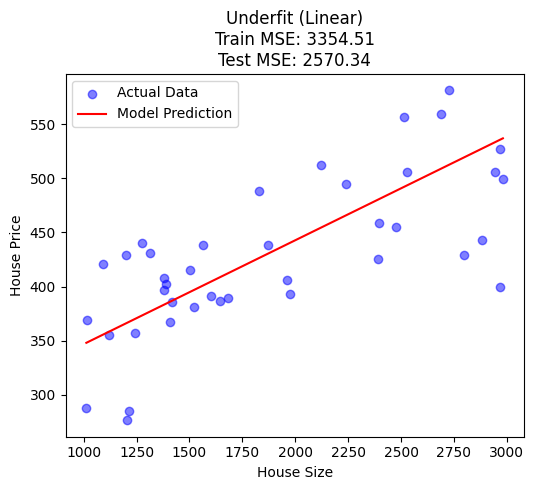

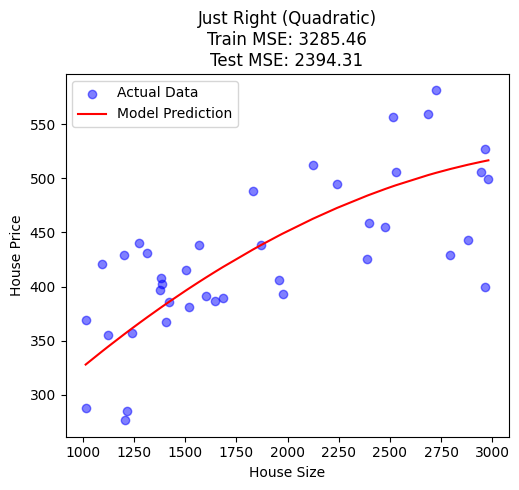

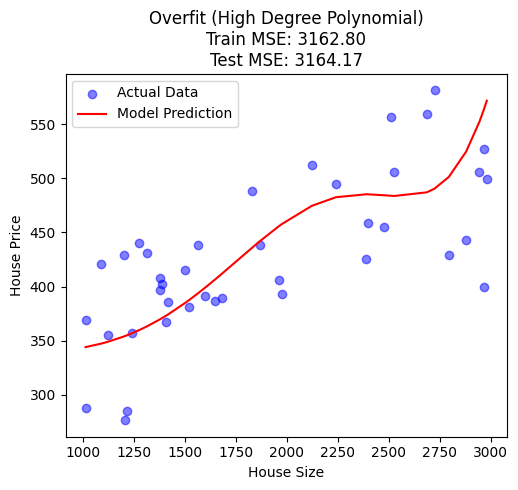

Model Complexity Comparison: 
Underfit (Linear):
  Train MSE: 3354.51
  Test MSE: 2570.34 

Just Right (Quadratic):
  Train MSE: 3285.46
  Test MSE: 2394.31 

Overfit (High Degree Polynomial):
  Train MSE: 3162.80
  Test MSE: 3164.17 



In [87]:
# Prepare the data
if use_windows:
    X = data_w[['Size', 'Windows']]
    y = data_w['Price']
else:
    X = data[['Size']]
    y = data['Price']
    
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create models of varying complexity
if use_windows:
        models = [
        ('Underfit (Linear)', make_pipeline(PolynomialFeatures(degree=1, include_bias=False), LinearRegression())),
        ('Just Right (Quadratic)', make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())),
        ('Overfit (High Degree Polynomial)', make_pipeline(PolynomialFeatures(degree=5, include_bias=False), LinearRegression()))
         ]
else:    
    models = [
        ('Underfit (Linear)', LinearRegression()),
        ('Just Right (Quadratic)', make_pipeline(PolynomialFeatures(2), LinearRegression())),
        ('Overfit (High Degree Polynomial)', make_pipeline(PolynomialFeatures(10), LinearRegression()))
    ]

# Visualize different model complexities
   
for i, (name, model) in enumerate(models, 1):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate errors
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
       
    if not use_windows:   
        plt.figure(figsize=(15, 5)) # Plot
        plt.subplot(1, 3, i)
        
        # Sort X for smooth curve plotting
        sort_axis = np.argsort(X_test.values.flatten())
        X_test_sorted = X_test.values[sort_axis]
        y_test_sorted = y_test.values[sort_axis]
        y_pred_sorted = y_test_pred[sort_axis]
        
        # Scatter plot of actual data
        plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Data')
        
        # Plot the model's predictions
        plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Model Prediction')
        
        plt.title(f'{name}\nTrain MSE: {train_mse:.2f}\nTest MSE: {test_mse:.2f}')
        plt.xlabel('House Size')
        plt.ylabel('House Price')
        plt.legend()
        plt.tight_layout()
        
    else:  
        fig = plt.figure(figsize=(10, 8)) 
        ax = fig.add_subplot(111, projection='3d')
        
        # Scatter plot of actual data
        scatter = ax.scatter(X_test['Size'], X_test['Windows'], y_test, c=y_test, cmap='viridis', alpha=0.5, label='Actual Data')
        
        # Create a grid for prediction surface
        size_range = np.linspace(X_test['Size'].min(), X_test['Size'].max(), 30)
        windows_range = np.linspace(X_test['Windows'].min(), X_test['Windows'].max(), 30)
        size_grid, windows_grid = np.meshgrid(size_range, windows_range)
        
        X_grid = np.column_stack([size_grid.ravel(), windows_grid.ravel()])# Prepare grid for prediction
        z_pred = model.predict(X_grid).reshape(size_grid.shape) # Predict for the grid        
        surf = ax.plot_surface(size_grid, windows_grid, z_pred, alpha=0.5, color='red', label='Model Prediction') # Plot prediction surface
        
        ax.set_xlabel('House Size')
        ax.set_ylabel('Number of Windows')
        ax.set_zlabel('House Price')
        ax.set_title(f'{name}\nTrain MSE: {train_mse:.2f}\nTest MSE: {test_mse:.2f}')
        
        # Add colorbar
        #plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
        plt.legend()
        
plt.show()

# Print out detailed MSE comparison
print("Model Complexity Comparison: ")
for name, model in models:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    print(f"{name}:")
    print(f"  Train MSE: {train_mse:.2f}")
    print(f"  Test MSE: {test_mse:.2f} \n")

la curva rossa è la predizione del modello --> funzione di regressione su piano 3D.
la distanza dei punti dalla curva rappresenta un errore nella predizione del modello

*modello lineare*
- TEST MSE più basso --> lineare . imparo poco dal modello
- TRAIN MSE alto--> sbaglia molto sui nuovi dati di train


*la curva quadratica* è quella che approssima meglio il modello anche in questo caso... 
- Train e Test MSE bilanciati


*la curva polinomiale di V grado*
- MSE basso, ma va in overfitting con i dati in input, incluso il rumore. il miglior errore sul TRAIN perchè sta imparando troppo dal modello)
- Test MSE >> aumenta molto rispetto agli altri casi







## Conclusion

Congratulations! You've just built and trained your first machine learning model using linear regression. Here's what we learned:

1. How to prepare and visualize data
2. How to split data into training and testing sets
3. How to create and train a linear regression model
4. How to evaluate the model's performance
5. How to use the model to make new predictions
6. How to qualitatively assess if we are overfitting or underfitting

This is just the beginning of your machine learning journey. As you progress, you can explore more complex algorithms and datasets!